In [1]:
import numpy as np

def vtrap(x,y):
    if np.any(np.abs(x/y) < 1e-6):
        vtrap = y*(1 - x/y/2)
    else:
        vtrap = x/(np.exp(x/y) - 1)
    return vtrap


v = np.linspace(-150, 20, 1000)

# Activation curves from the original modfiles
#na m
alpha_nam = .1 * vtrap(-(v+40),10)
beta_nam =  4 * np.exp(-(v+65)/18)

#na h
alpha_nah = .07 * np.exp(-(v+65)/20)
beta_nah = 1 / (np.exp(-(v+35)/10) + 1)
        
#k n
alpha_kn = .01*vtrap(-(v+55),10) 
beta_kn = .125*np.exp(-(v+65)/80)  

nam = alpha_nam / (alpha_nam + beta_nam)
nah = alpha_nah / (alpha_nah + beta_nah)
kdr = alpha_kn / (alpha_kn + beta_kn)


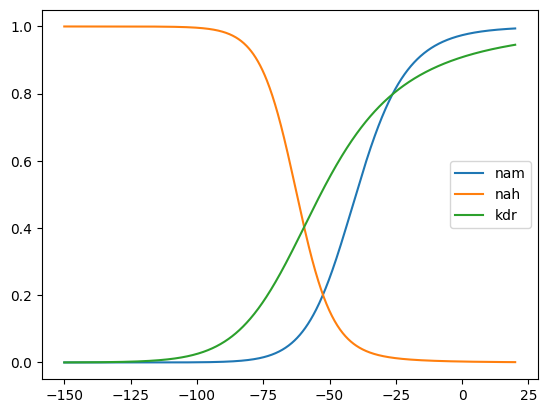

In [2]:
import matplotlib.pyplot as plt

plt.plot(v, nam, label = 'nam')
plt.plot(v, nah, label = 'nah')
plt.plot(v, kdr, label = 'kdr')
plt.legend()

In [3]:
import os
os.system('nrnivmodl')

/home/mwsrgf/proj/ACT/data/Spiker_Izhikevich/orig
Mod files: "./hh_orig.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.so
Successfully created x86_64/special


/home/mwsrgf/act-venv/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set


0

In [4]:
# Izhikevich p. 307

import matplotlib.pyplot as plt

from neuron import h
h.load_file('stdrun.hoc')

--No graphics will be displayed.


1.0

In [5]:
h.load_file("template.hoc")
cell = h.Spiker_Izhikevich_orig()

In [6]:
cell.soma[0](0.5).cm

1.0

In [7]:
# CI
ci = h.IClamp(cell.soma[0](0.5))
ci.amp = 0.5 # (nA)
ci.delay = 50
ci.dur = 150

# V recording
v_orig = h.Vector().record(cell.soma[0](0.5)._ref_v)

In [8]:
h.tstop = 200
h.dt = 0.1
h.steps_per_ms = 1 / h.dt
h.v_init = -50

In [9]:
h.run()

0.0

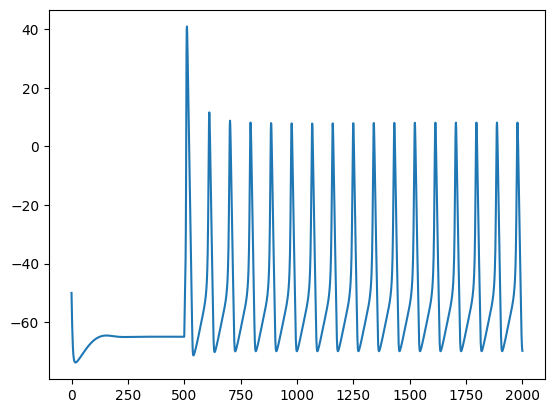

In [10]:
plt.plot(v_orig.as_numpy())
np.save("orig_v.npy", v_orig)